# Jupyter notebook sample

In [21]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt 

In [22]:
url ='https://docs.google.com/spreadsheets/d/1OtDkT4jpVQ_q1jLEmTyUMCBitWPZhlTRGs3gTQKMgAc/edit?usp=sharing'

In [23]:



#get spreadsheets key from url
gsheetkey = "1OtDkT4jpVQ_q1jLEmTyUMCBitWPZhlTRGs3gTQKMgAc"

#sheet name
sheet_name = 'Sheet1 (1)'

url=f'https://docs.google.com/spreadsheet/ccc?key={gsheetkey}&output=xlsx'
df = pd.read_excel(url,sheet_name=sheet_name)

In [24]:
df.head(10)

,Регион,Магазин,Клиент,"ТО, руб.","Маржа, руб.",Маржа %,Чеков,presale/all
0,Регион 7,012 НОВОСИБИРСК,"ООО ""РАЗРЕЗ ВОСТОЧНЫЙ""",-38112.0,-11277.0,0.355069,NaN,all
1,Регион 7,124 НОВОСИБИРСК-4,"ООО ""БИЛДСЕРВИС""",-23408.0,-2188.0,0.112167,1.0,all
2,Регион 7,030 НОВОСИБИРСК 2,"ООО ""РЕЧТОРГ""",-22902.0,-5654.0,0.296254,NaN,all
3,Регион 7,110 Тюмень Тобольский тракт,"ООО ""СК КВАДРАТ""",-21375.0,-4828.0,0.271046,12.0,all
4,Регион 7,030 НОВОСИБИРСК 2,"ООО ""А-СП""",-15927.0,-2488.0,0.187455,2.0,all
5,Регион 7,031 ТЮМЕНЬ,"ООО ""ЭКВОРА""",-13287.0,-3180.0,0.287198,1.0,all
6,Регион 7,110 Тюмень Тобольский тракт,"ООО ""ОФОРМИСТ""",-12731.0,-2899.0,0.273254,3.0,all
7,Регион 7,016 ОМСК,"ООО ""ПАРФЮМ-ЛИДЕР""",-11781.0,-2061.0,0.209931,3.0,all
8,Регион 7,110 Тюмень Тобольский тракт,"ООО ""НЕОФИТ""",-10485.0,6497.0,-0.743577,21.0,all
9,Регион 7,129 Новокузнецк 2,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЗАВО...",-7480.0,-2095.0,0.336096,4.0,all


In [25]:
df.describe()

,"ТО, руб.","Маржа, руб.",Маржа %,Чеков
count,18810.000000,18810.000000,18805.000000,44334.000000
mean,11829.723392,1901.584848,0.239676,11.630103
std,27534.711639,4845.041724,0.184234,26.468933
min,-38112.000000,-156338.000000,-1.941684,1.000000
25%,1080.000000,147.250000,0.150861,1.000000
50%,3844.000000,595.000000,0.253511,3.000000
75%,11961.250000,1992.000000,0.339447,11.000000
max,930328.000000,242012.000000,8.880000,1019.000000


In [42]:
duplicates = df.duplicated('Чеков').sum()
duplicates

np.int64(44060)

In [46]:
df = df.drop_duplicates('Чеков')
df

,Регион,Магазин,Клиент,"ТО, руб.","Маржа, руб.",Маржа %,Чеков,presale/all
0,Регион 7,012 НОВОСИБИРСК,"ООО ""РАЗРЕЗ ВОСТОЧНЫЙ""",-38112.0,-11277.0,0.355069,NaN,all
1,Регион 7,124 НОВОСИБИРСК-4,"ООО ""БИЛДСЕРВИС""",-23408.0,-2188.0,0.112167,1.0,all
3,Регион 7,110 Тюмень Тобольский тракт,"ООО ""СК КВАДРАТ""",-21375.0,-4828.0,0.271046,12.0,all
4,Регион 7,030 НОВОСИБИРСК 2,"ООО ""А-СП""",-15927.0,-2488.0,0.187455,2.0,all
6,Регион 7,110 Тюмень Тобольский тракт,"ООО ""ОФОРМИСТ""",-12731.0,-2899.0,0.273254,3.0,all
...,...,...,...,...,...,...,...,...
44334,Регион 7,067 НОВОСИБИРСК 3 РОДНИКИ,"ООО ""ЗапСиб Ресурс""",488202.0,90660.0,0.222842,512.0,all
44336,Регион 7,088 ОМСК АМУРСКАЯ,"ООО ""ОВК""",563519.0,53846.0,0.114664,263.0,all
44338,Регион 7,087 Сургут,"ООО ""СПЕЦПРОМСЕРВИС""",578411.0,70593.0,0.146456,318.0,all
44339,Регион 7,030 НОВОСИБИРСК 2,"ООО ""СОВТЕХ СИБИРЬ""",591533.0,110169.0,0.223492,659.0,all


In [47]:
df.groupby(['Магазин', 'Клиент'])['Чеков'].sum().sort_values(ascending=False).loc[lambda x: x > 100]

Магазин                    Клиент               
129 Новокузнецк 2          АО "ЕВРАЗ ЗСМК"          1019.0
036 БАРНАУЛ                ООО "АЭС"                 762.0
030 НОВОСИБИРСК 2          ООО "СИБСТРОЙ"            676.0
                           ООО "СОВТЕХ СИБИРЬ"       659.0
087 Сургут                 ООО "РСС"                 583.0
                                                     ...  
012 НОВОСИБИРСК            ООО "АВАНТАЖДОМ"          105.0
030 НОВОСИБИРСК 2          ООО "ВЕКТОР"              104.0
129 Новокузнецк 2          МП "КУЗНЕЦКИЙ САД"        103.0
030 НОВОСИБИРСК 2          ООО "ТВЕТРА"              102.0
067 НОВОСИБИРСК 3 РОДНИКИ  ООО "МОНОЛИТГАЗСТРОЙ"     101.0
Name: Чеков, Length: 183, dtype: float64

In [48]:
df.groupby(['Клиент', 'Магазин'])['Чеков'].sum().sort_values(ascending=False).loc[lambda x: x > 100]

Клиент                 Магазин                  
АО "ЕВРАЗ ЗСМК"        129 Новокузнецк 2            1019.0
ООО "АЭС"              036 БАРНАУЛ                   762.0
ООО "СИБСТРОЙ"         030 НОВОСИБИРСК 2             676.0
ООО "СОВТЕХ СИБИРЬ"    030 НОВОСИБИРСК 2             659.0
ООО "РСС"              087 Сургут                    583.0
                                                     ...  
ООО "АВАНТАЖДОМ"       012 НОВОСИБИРСК               105.0
ООО "ВЕКТОР"           030 НОВОСИБИРСК 2             104.0
МП "КУЗНЕЦКИЙ САД"     129 Новокузнецк 2             103.0
ООО "ТВЕТРА"           030 НОВОСИБИРСК 2             102.0
ООО "МОНОЛИТГАЗСТРОЙ"  067 НОВОСИБИРСК 3 РОДНИКИ     101.0
Name: Чеков, Length: 183, dtype: float64

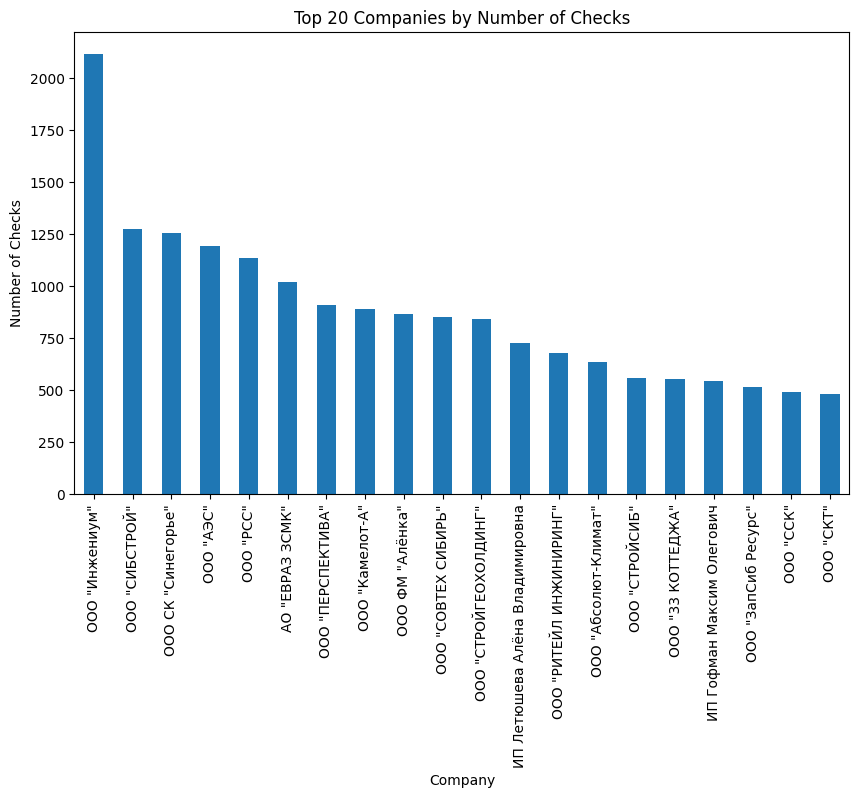

In [49]:
company_checks = df.groupby('Клиент')['Чеков'].sum().sort_values(ascending=False)

# Get the top 20 companies
top_companies = company_checks.head(20)

# Create the bar chart
top_companies.plot(kind='bar', figsize=(10, 6))
plt.title('Top 20 Companies by Number of Checks')
plt.xlabel('Company')
plt.ylabel('Number of Checks')
plt.show()

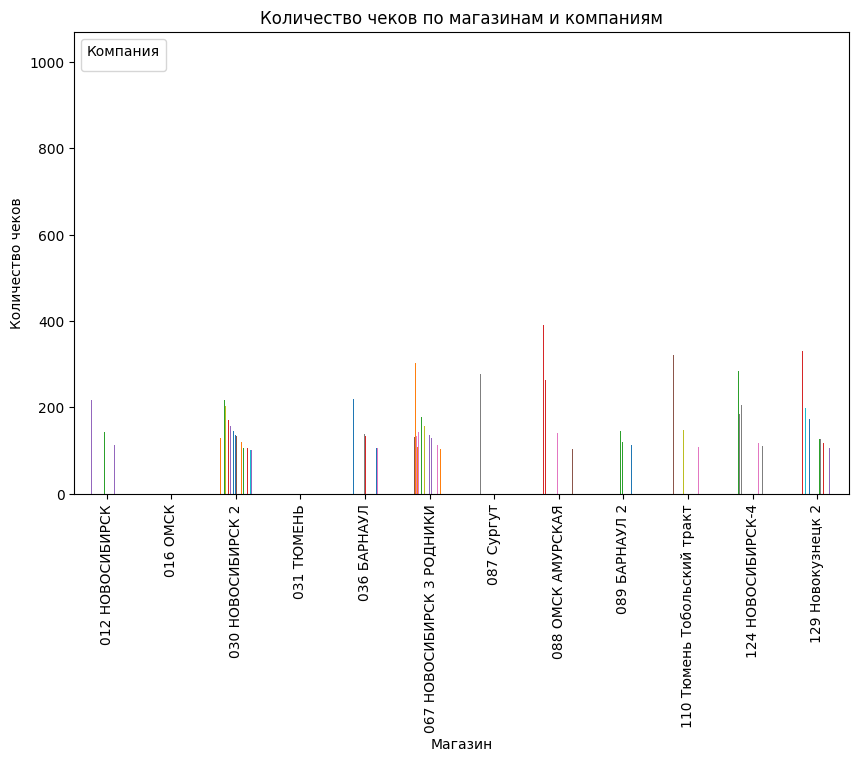

In [34]:
import matplotlib.pyplot as plt

df_filtered = df[df.groupby(['Магазин'])['Чеков'].transform('sum') > 1000]
df_grouped = df_filtered.groupby(['Магазин', 'Клиент'])['Чеков'].sum().sort_values(ascending=False)

df_grouped.unstack('Клиент').plot(kind='bar', figsize=(10, 6))
plt.title('Количество чеков по магазинам и компаниям')
plt.xlabel('Магазин')
plt.ylabel('Количество чеков')
plt.legend(title='Компания', labels=[])  # Remove the list of clients from the legend
plt.show()

C:\Users\Dimon\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


KeyboardInterrupt: 